In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R

# Read data
df_all_seasons <- read_csv('imdb_all_seasons.csv')

Rows: 911 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): hosts
dbl  (4): ratings, votes, sid, epid
date (1): date_datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
%%R

mean_ratings <- df_all_seasons %>%
    group_by(sid) %>%
    summarise(mean_rating = mean(ratings)) %>%
    mutate(sid = as.character(sid))

mean_ratings


# A tibble: 46 × 2
   sid   mean_rating
   <chr>       <dbl>
 1 1            6.98
 2 2            7.06
 3 3            7.22
 4 4            7.12
 5 5            6.7 
 6 6            6.05
 7 7            6.24
 8 8            6.98
 9 9            6.21
10 10           6.38
# ℹ 36 more rows
# ℹ Use `print(n = ...)` to see more rows


In [6]:
%%R

library(ggthemes)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 



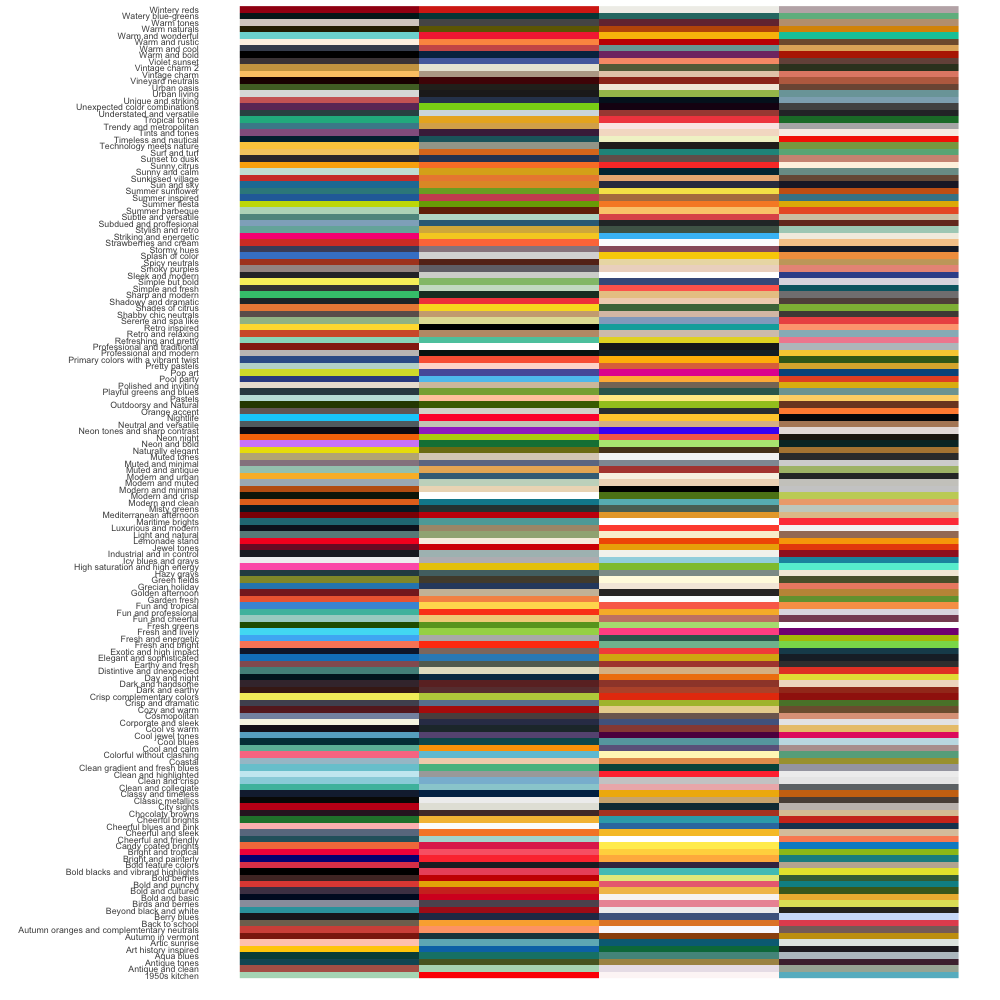

In [7]:
%%R -w 1000 -h 1000

canva_df <- map2_df(
        canva_palettes,
        names(canva_palettes),
        ~ tibble(
                colors = .x,
                .id = seq_along(colors),
                palette = .y
        )
)   

ggplot(canva_df, aes(
                y = palette,
                x = .id,
                fill = colors
        )) +
                geom_raster() +
                scale_fill_identity(guide = FALSE) +
                theme_minimal() +
                theme(panel.grid = element_blank(),
                      axis.text.x = element_blank()) +
                labs(x = "", y = "")

In [11]:
df_all_seasons = pd.read_csv('imdb_all_seasons.csv')

mean_ratings = df_all_seasons.groupby('sid').ratings.mean().reset_index()

mean_ratings

,sid,ratings
0,1,6.975000
1,2,7.056522
2,3,7.225000
3,4,7.125000
4,5,6.700000
5,6,6.053846
6,7,6.240000
7,8,6.985000
8,9,6.210526
9,10,6.377778


In [12]:
mean_ratings.loc[mean_ratings['ratings'].idxmax(), 'sid']


3

In [13]:
mean_ratings['ratings'].max()

7.225

In [28]:
mean_ratings['ratings'].min()

5.385

In [20]:
%%R

# Ensure 'sid' and 'mean_rating' are numeric
mean_ratings$sid <- as.numeric(mean_ratings$sid)
mean_ratings$mean_rating <- as.numeric(mean_ratings$mean_rating)


In [22]:
%%R -w 1200 -h 800

annotation <- data.frame(
   x = c(3,28),
   y = c(8, 7.5),
   label = c("Season 3", "Season 28")
)

# Plot a bar chart of the mean ratings with custom color
season_chart <- mean_ratings %>%
  arrange(sid) %>%
  ggplot(aes(x = sid, y = mean_rating)) +
  geom_bar(stat = "identity", aes(fill = factor(ifelse(sid == 3, "Color for 3", ifelse(sid == 28, "Color for 28", "Default Color"))))) +
  scale_fill_manual(values = c("Color for 3" = "#6d003b", "Color for 28" = "#660067", "Default Color" = "#01285c")) +
  theme_fivethirtyeight(base_size = 18, base_family = "sans") +
  scale_x_continuous(breaks = seq(min(mean_ratings$sid), max(mean_ratings$sid), 1)) +
  scale_y_continuous(limits = c(0, 9)) +
  annotate("segment", x = 28, xend = 30, y = 5.5, yend = 7.2, colour = "black", size = 1, linetype = "solid", arrow = arrow(length = unit(0.5, "cm"))) +
  annotate("segment", x = 3, xend = 4, y = 7.3, yend = 7.8, colour = "black", size = 1, linetype = "solid", arrow = arrow(length = unit(0.5, "cm"))) +
  geom_text(
    data=annotation,
    aes(
      x=x,
      y=y,
      label=label
    ),
    size=8,
    angle=0,
    vjust=0,
    hjust=0,
    color="black"
  ) +
  labs(title = "Ratings across seasons don't actually vary that much",
       subtitle = "Average episode ratings for each season from IMDB",
       x = "Season", y = "Mean rating") +
  guides(fill = FALSE)  # Optionally hide the legend


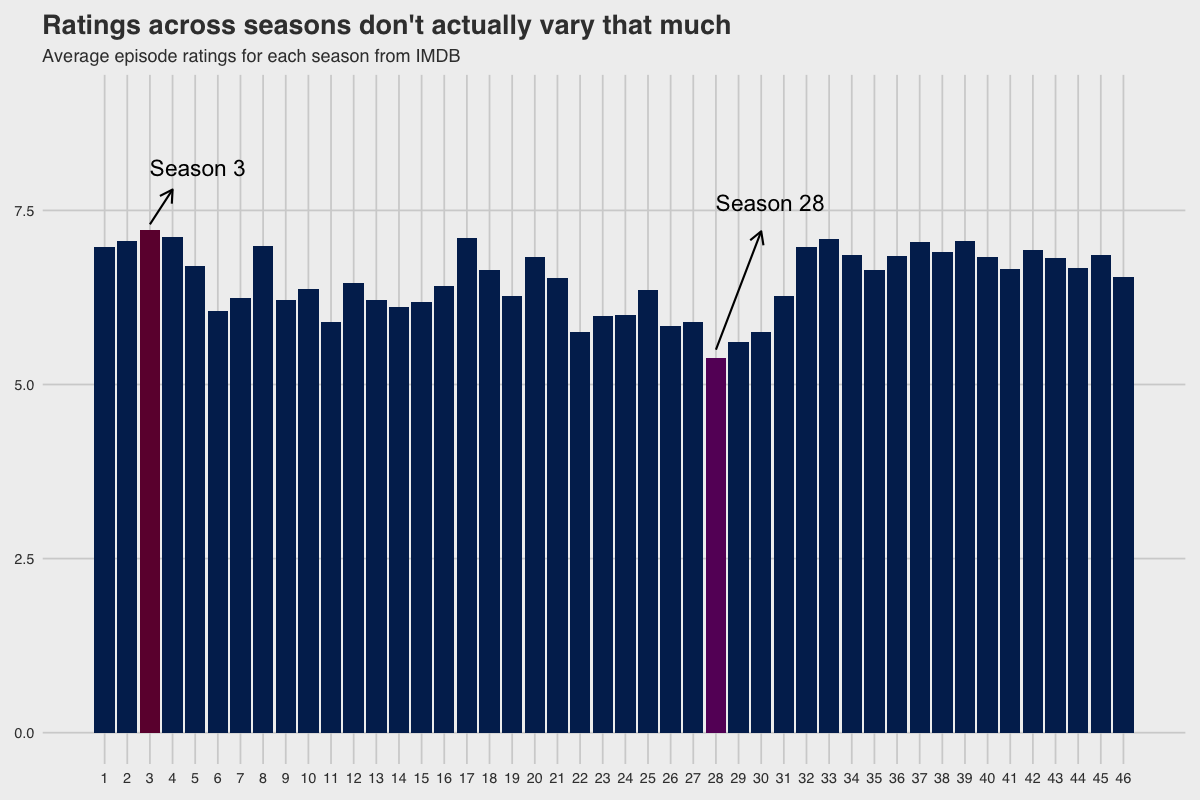

In [27]:
%%R -w 1200 -h 800

season_chart

In [26]:
%%R

# Save the plot as an SVG with dimensions in pixels
ggsave("season_chart.svg", plot = season_chart, width = 1200, height = 800, units = "px")


In [ ]:
%%R

df_cast <- read_csv('snl_cast_weighted_scores.csv')
df_cast

Rows: 154 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cast
dbl (1): wt_rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 154 × 2
   cast             wt_rating
   <chr>                <dbl>
 1 Laurie Metcalf       0.464
 2 Robert Smigel        0.491
 3 Emily Prager         0.502
 4 Fred Wolf            0.580
 5 George Coe           0.592
 6 Colin Quinn          0.596
 7 Yvonne Hudson        0.601
 8 Colin Jost           0.612
 9 Michael Che          0.616
10 Patrick Weathers     0.621
# ℹ 144 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R

#sort descending by score
df_cast <- df_cast %>%
    arrange(desc(wt_rating))

df_cast

# A tibble: 154 × 2
   cast          wt_rating
   <chr>             <dbl>
 1 Bill Murray        2.97
 2 Phil Hartman       2.91
 3 Kristen Wiig       2.59
 4 Taran Killam       2.56
 5 Bill Hader         2.54
 6 Beck Bennett       2.42
 7 Cecily Strong      2.42
 8 Dan Aykroyd        2.37
 9 Joe Piscopo        2.34
10 Jane Curtin        2.34
# ℹ 144 more rows
# ℹ Use `print(n = ...)` to see more rows


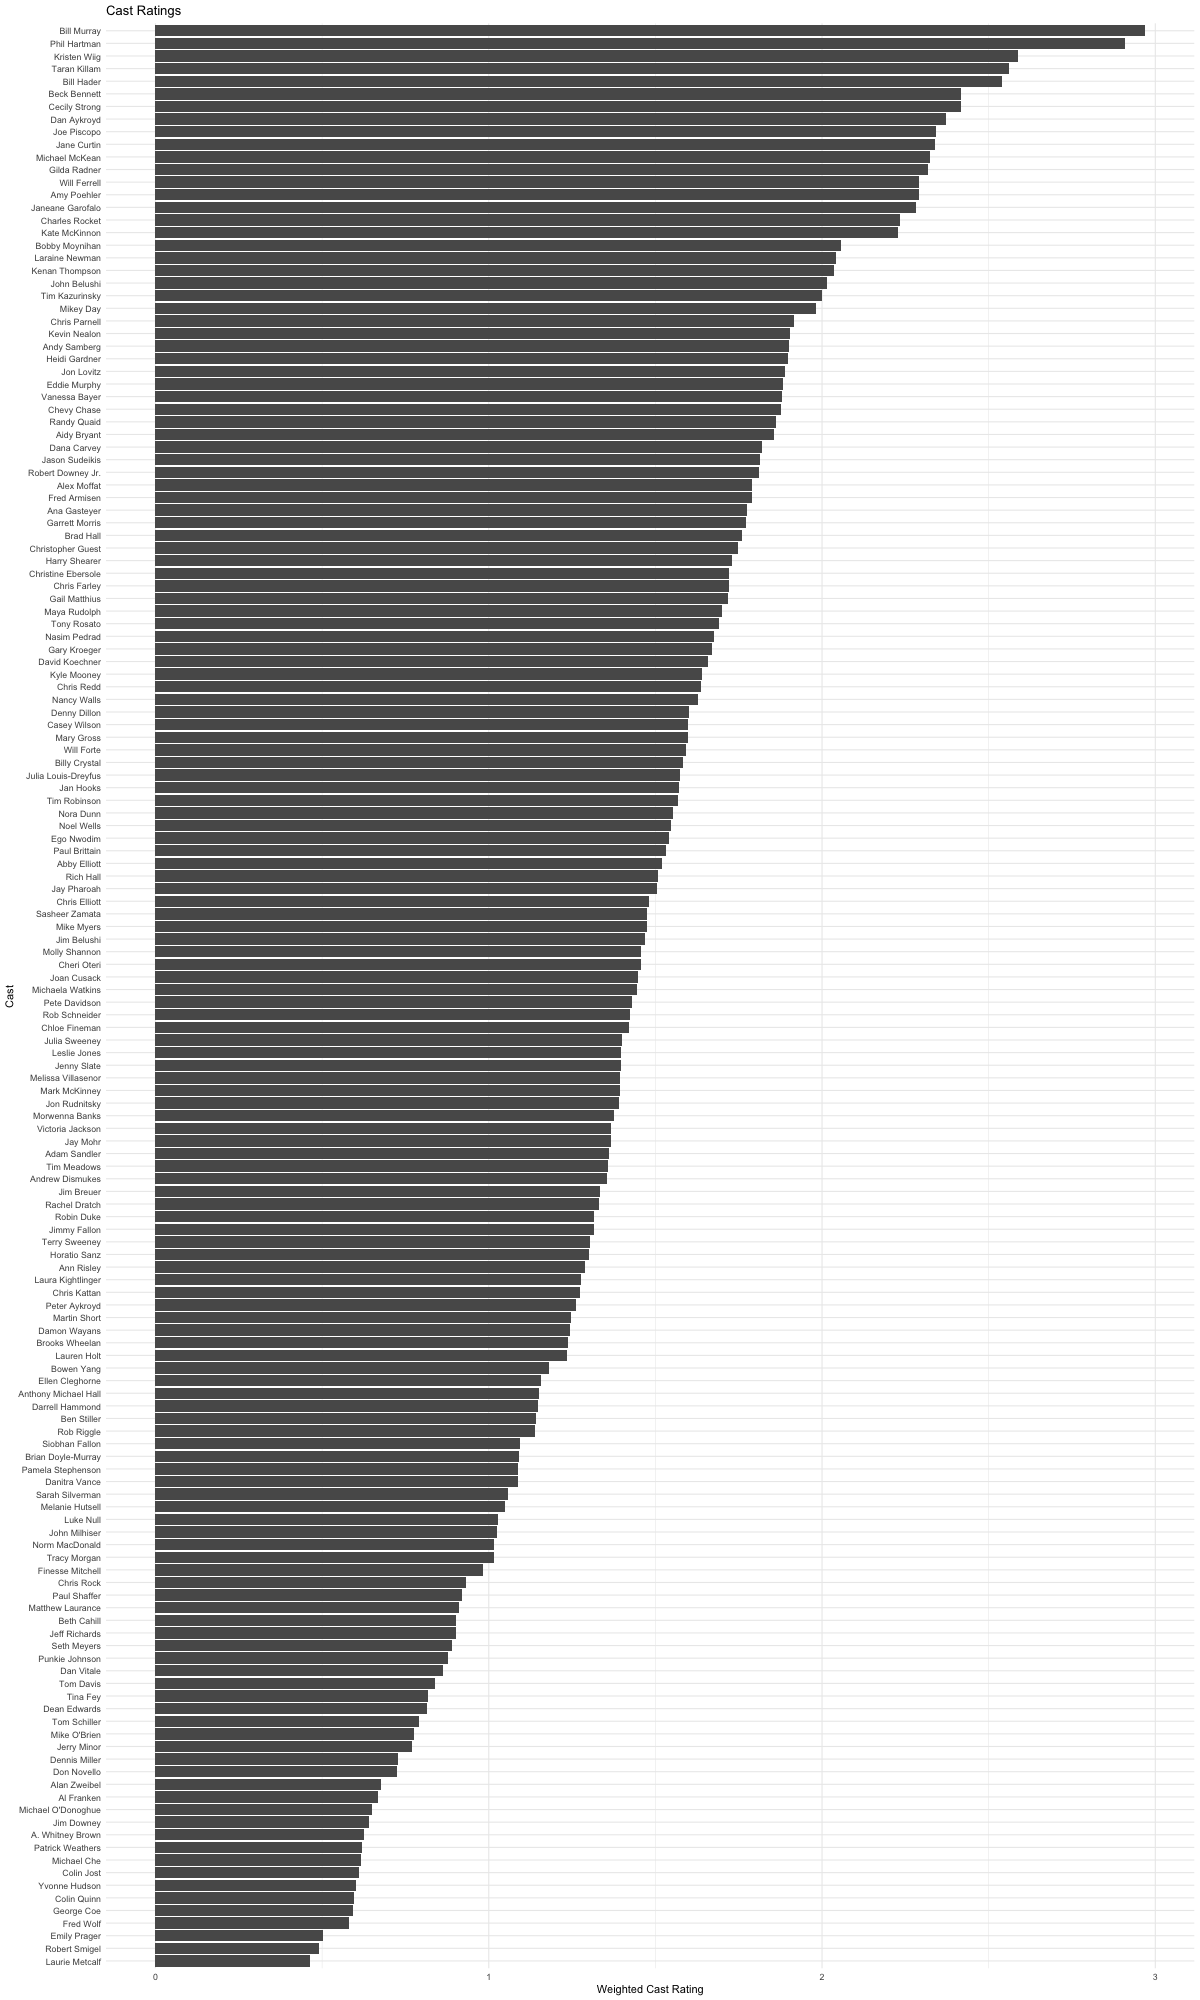

In [ ]:
%%R -w 1200 -h 2000

# Assuming df_cast is already loaded and available

# Reorder 'cast' based on 'wt_rating' to ensure correct bar order
df_cast$cast <- factor(df_cast$cast, levels = df_cast$cast[order(df_cast$wt_rating, decreasing = FALSE)])

# Plot a horizontal bar chart of the cast ratings with bars ordered by wt_rating
df_cast %>% 
  ggplot(aes(x = cast, y = wt_rating)) +
  geom_col() +  # Use geom_col for bar charts with pre-calculated values
  coord_flip() +  # Flip the axes to make the bars horizontal
  labs(title = "Cast Ratings",
       x = "Cast",
       y = "Weighted Cast Rating") +
  theme_minimal()
